In [4]:
from glob import glob
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import codecs
import netCDF4
import matplotlib.pyplot as plt

In [5]:
def make_tide(path,base): #base:abs(潮位基準面(cm))
    df = pd.DataFrame()
    #path = '../data/yoko202003.txt'

    #一日のデータを格納
    res = []
    with codecs.open(path,'r','utf-8','ignore') as f:
        l= f.readlines()
        #print(l)
        for i in range(len(l)):
            for j in range(24):
                #固定長なので、strで三個刻みで一時間ごとのデータを取得できる
                res.append((float(l[i][3*j]+l[i][3*j+1]+l[i][3*j+2])-base)/100) 
    print(len(res),res[:10])
    
    #日付列の作成
    datelist = []       
    for x in range(len(res)):
        t = dt.strptime('2020/1/1 00:00', '%Y/%m/%d %H:%M') \
                +timedelta(hours=x)#-timedelta(hours=9) #初期時間からhours=xだけずらした時間 
        t = t.strftime('%m/%d/%Y %H:%M') #書式の変換
        datelist.append(t)
    print(datelist[:10])
    
    #create df
    df = pd.DataFrame()
    df['Time'] = datelist
    df['tide'] = res
    return df


In [6]:
df_yoko = make_tide('../data/yoko202003.txt',104.9)

8784 [-0.43900000000000006, -0.6090000000000001, -0.679, -0.629, -0.47900000000000004, -0.24900000000000005, 0.010999999999999944, 0.24099999999999994, 0.39099999999999996, 0.44099999999999995]
['01/01/2020 00:00', '01/01/2020 01:00', '01/01/2020 02:00', '01/01/2020 03:00', '01/01/2020 04:00', '01/01/2020 05:00', '01/01/2020 06:00', '01/01/2020 07:00', '01/01/2020 08:00', '01/01/2020 09:00']


In [7]:
df_abura = make_tide('../data/Abura.txt',90.8)

8784 [-0.44799999999999995, -0.588, -0.628, -0.568, -0.428, -0.21799999999999997, 0.0020000000000000282, 0.20200000000000004, 0.332, 0.37200000000000005]
['01/01/2020 00:00', '01/01/2020 01:00', '01/01/2020 02:00', '01/01/2020 03:00', '01/01/2020 04:00', '01/01/2020 05:00', '01/01/2020 06:00', '01/01/2020 07:00', '01/01/2020 08:00', '01/01/2020 09:00']


In [9]:
df_mera = make_tide('../data/MR2020.txt',81.4)

8784 [-0.41400000000000003, -0.544, -0.5640000000000001, -0.49400000000000005, -0.32400000000000007, -0.11400000000000006, 0.10599999999999994, 0.29599999999999993, 0.4059999999999999, 0.43599999999999994]
['01/01/2020 00:00', '01/01/2020 01:00', '01/01/2020 02:00', '01/01/2020 03:00', '01/01/2020 04:00', '01/01/2020 05:00', '01/01/2020 06:00', '01/01/2020 07:00', '01/01/2020 08:00', '01/01/2020 09:00']


In [8]:
#to_csv
df_abura.to_csv('../output/tide_2020_abura.csv')

## plot

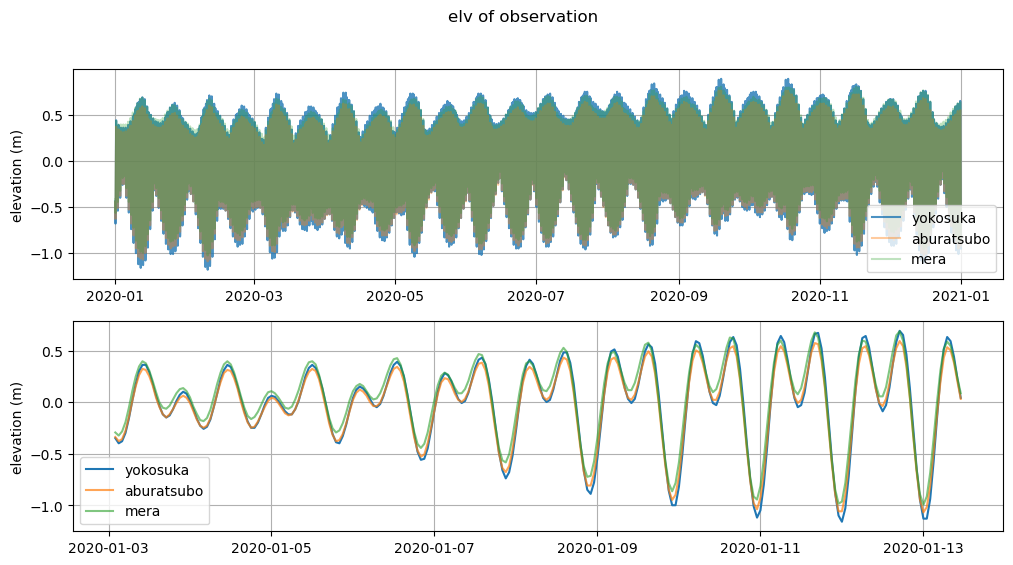

In [50]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
fig,axs = plt.subplots(2,1,figsize=(12,6))
#alpha 透過率
#0 全体図 
date = pd.to_datetime(df_mera['Time'])
fig.suptitle('elv of observation')
axs[0].plot(date,df_yoko['tide'],alpha = 0.8,label='yokosuka')
axs[0].plot(date,df_abura['tide'],alpha = 0.4,label='aburatsubo')
axs[0].plot(date,df_mera['tide'],alpha = 0.3,label='mera')
start = 50; stop = 300;
axs[1].plot(date[start:stop],df_yoko['tide'][start:stop],label='yokosuka')
axs[1].plot(date[start:stop],df_abura['tide'][start:stop],alpha = 0.7,label='aburatsubo')
axs[1].plot(date[start:stop],df_mera['tide'][start:stop],alpha = 0.6,label='mera')
for i in range(2):
    axs[i].legend();axs[i].grid();axs[i].set_ylabel('elevation (m)')
plt.show()
fig.savefig('../output/tide_observation.png')

## calculating

In [48]:
ave_yoko = df_yoko['tide'].sum()/len(df_yoko)
ave_mera = df_mera['tide'].sum()/len(df_mera)
ave_abura = df_abura['tide'].sum()/len(df_abura)
print(ave_yoko,ave_abura,ave_mera)

0.05077117486338792 0.08580305100182144 0.021807604735883453
